# Preparing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('./clean_dataset.csv')
train = df_train.copy()

In [3]:
train.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [4]:
train.shape

(690, 16)

In [5]:
train.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [7]:
train.describe(include=['O'])

,Industry,Ethnicity,Citizen
count,690,690,690
unique,14,5,3
top,Energy,White,ByBirth
freq,146,408,625


In [8]:
train.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


# EDA

In [9]:
# Feature extraction

numerical_features = ['Age', 'Debt', 'YearsEmployed', 'ZipCode', 'Income']
categorical_features = [
    'Gender', 'Married', 'BankCustomer', 'Industry', 'Ethnicity',
    'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen'
]

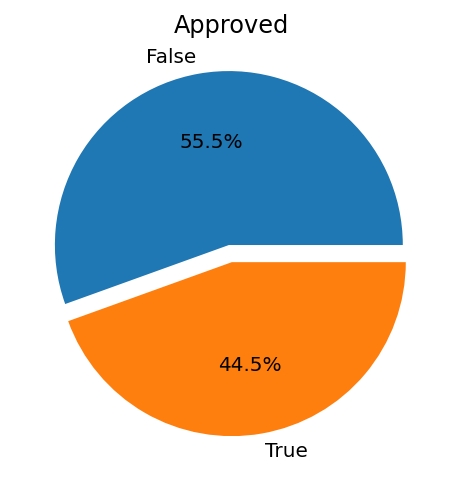

In [10]:
# Target value

proportion = train['Approved'].value_counts()
plt.pie(
    x=proportion.values,
    explode=[0.1, 0],
    labels=proportion.index.map({0: False, 1: True}),
    autopct='%1.1f%%'
)
plt.title("Approved");

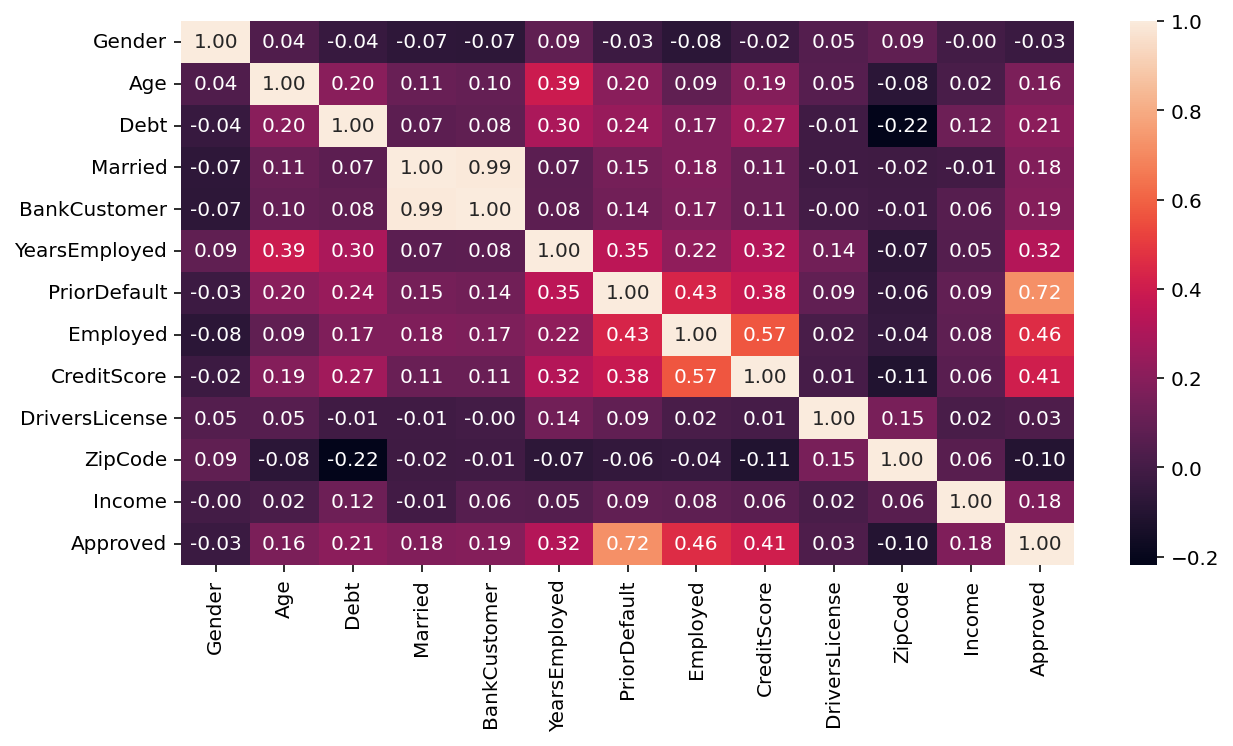

In [11]:
# Correlation between features

plt.figure(figsize=(10, 5))
sns.heatmap(train.corr(), annot=True, fmt='.2f');

<Figure size 1080x720 with 0 Axes>

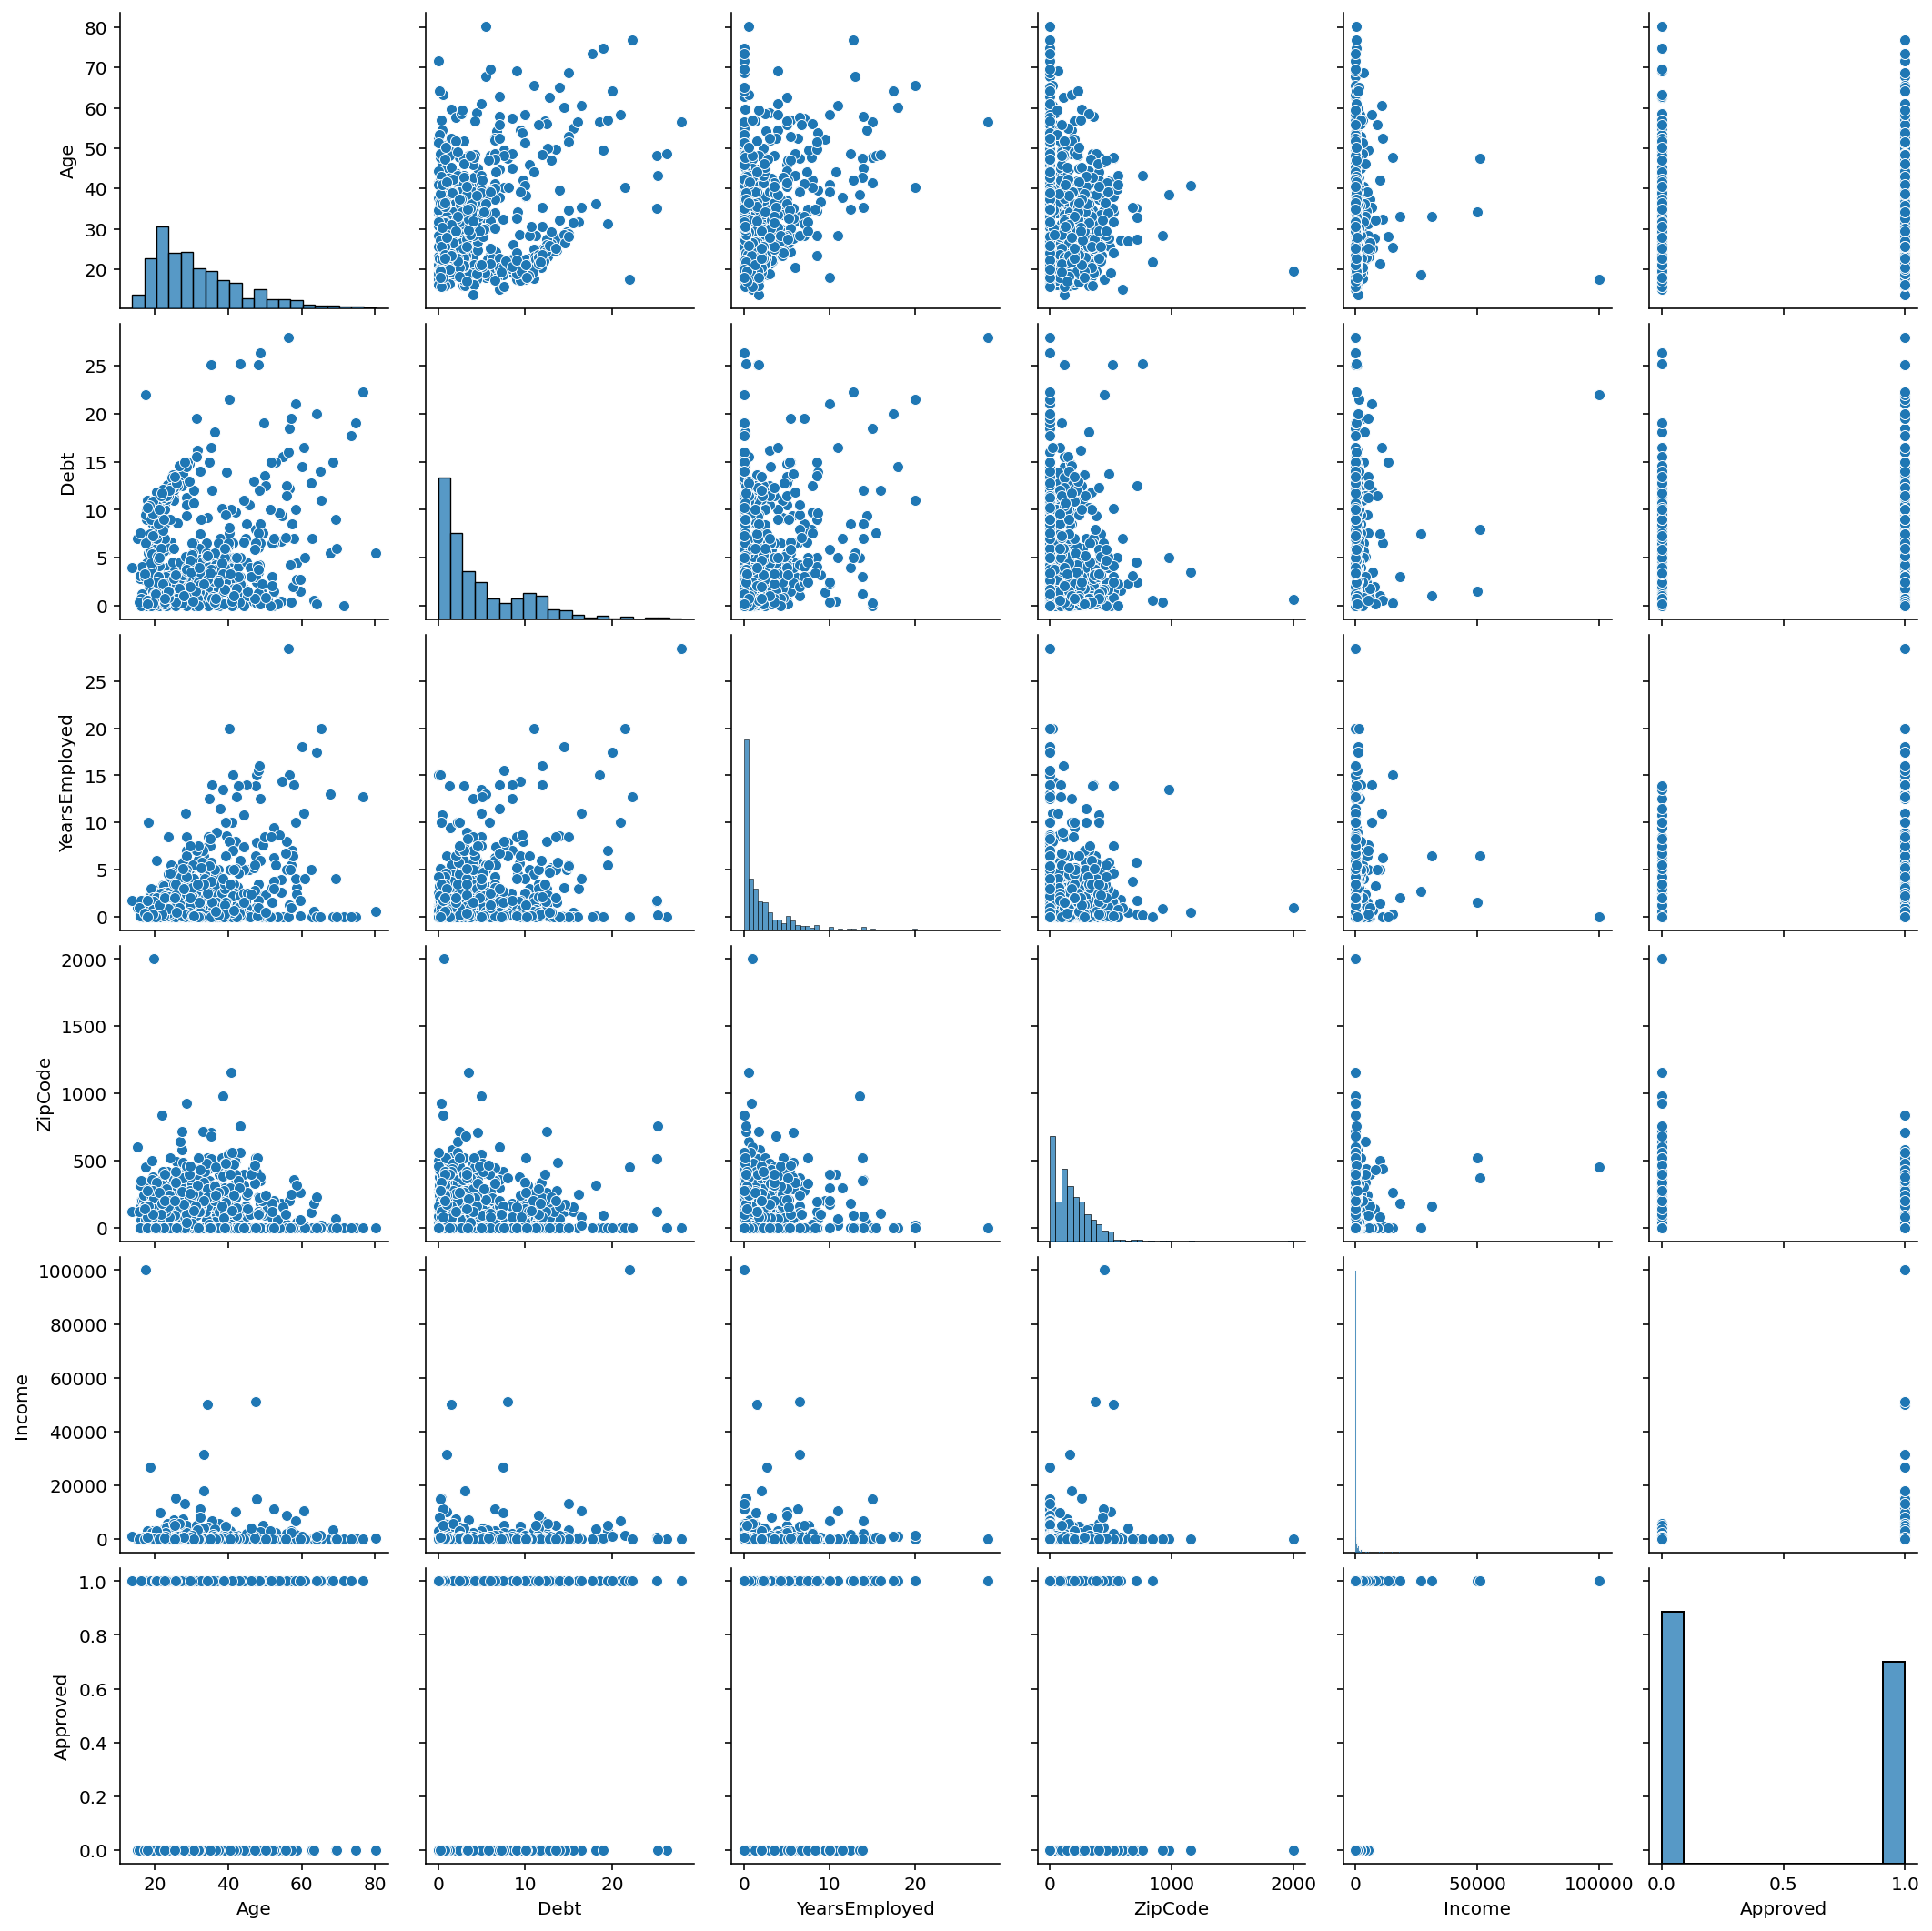

In [12]:
# Interaction of features

plt.figure(figsize=(15, 10))
sns.pairplot(train[numerical_features + ['Approved']]);

In [13]:
# Deleting outliers based on the graph above

outliers = [train[col].argmax() for col in ['YearsEmployed', 'ZipCode', 'Income']]
if len(outliers) == len(set(outliers)):
    train.drop(outliers, inplace=True)
train.shape

(687, 16)

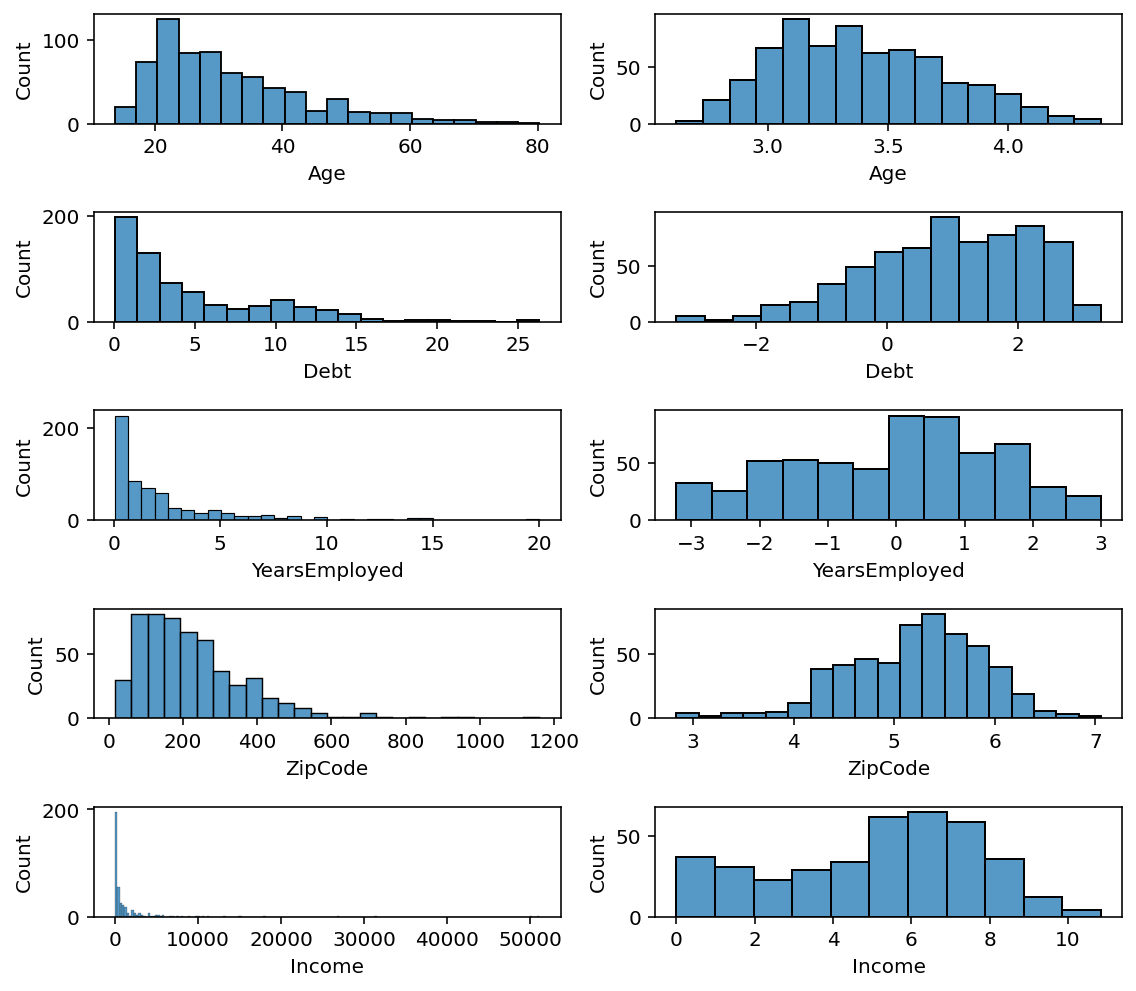

In [14]:
# Distribution of numerical features

total = len(numerical_features) * 2
cols = 2
rows = total // cols
rows += total % cols
fig = plt.figure(figsize=(8, 7))

for pos, col in enumerate(numerical_features):
    fig.add_subplot(rows, cols, cols * pos + 1)
    sns.histplot(x=train[col].replace(0, np.nan))
    fig.add_subplot(rows, cols, cols * pos + 2)
    sns.histplot(x=np.log(train[col].replace(0, np.nan)))
    
plt.tight_layout()    

In [15]:
# Logarithmic transformation of a highly skewed variables into a more normalized view

train[numerical_features] = np.log(train[numerical_features].replace(0, np.nan)).fillna(0)

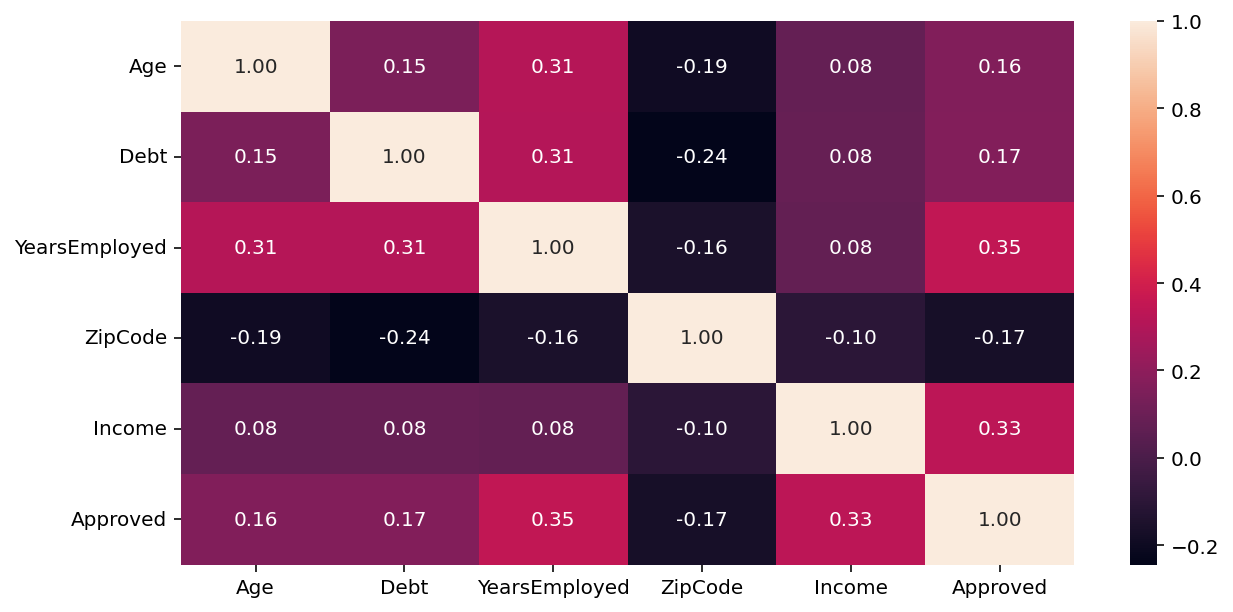

In [16]:
plt.figure(figsize=(10, 5))
sns.heatmap(train[numerical_features + ['Approved']].corr(), annot=True, fmt='.2f');

In [17]:
train[categorical_features].nunique()

Gender             2
Married            2
BankCustomer       2
Industry          14
Ethnicity          5
PriorDefault       2
Employed           2
CreditScore       22
DriversLicense     2
Citizen            3
dtype: int64

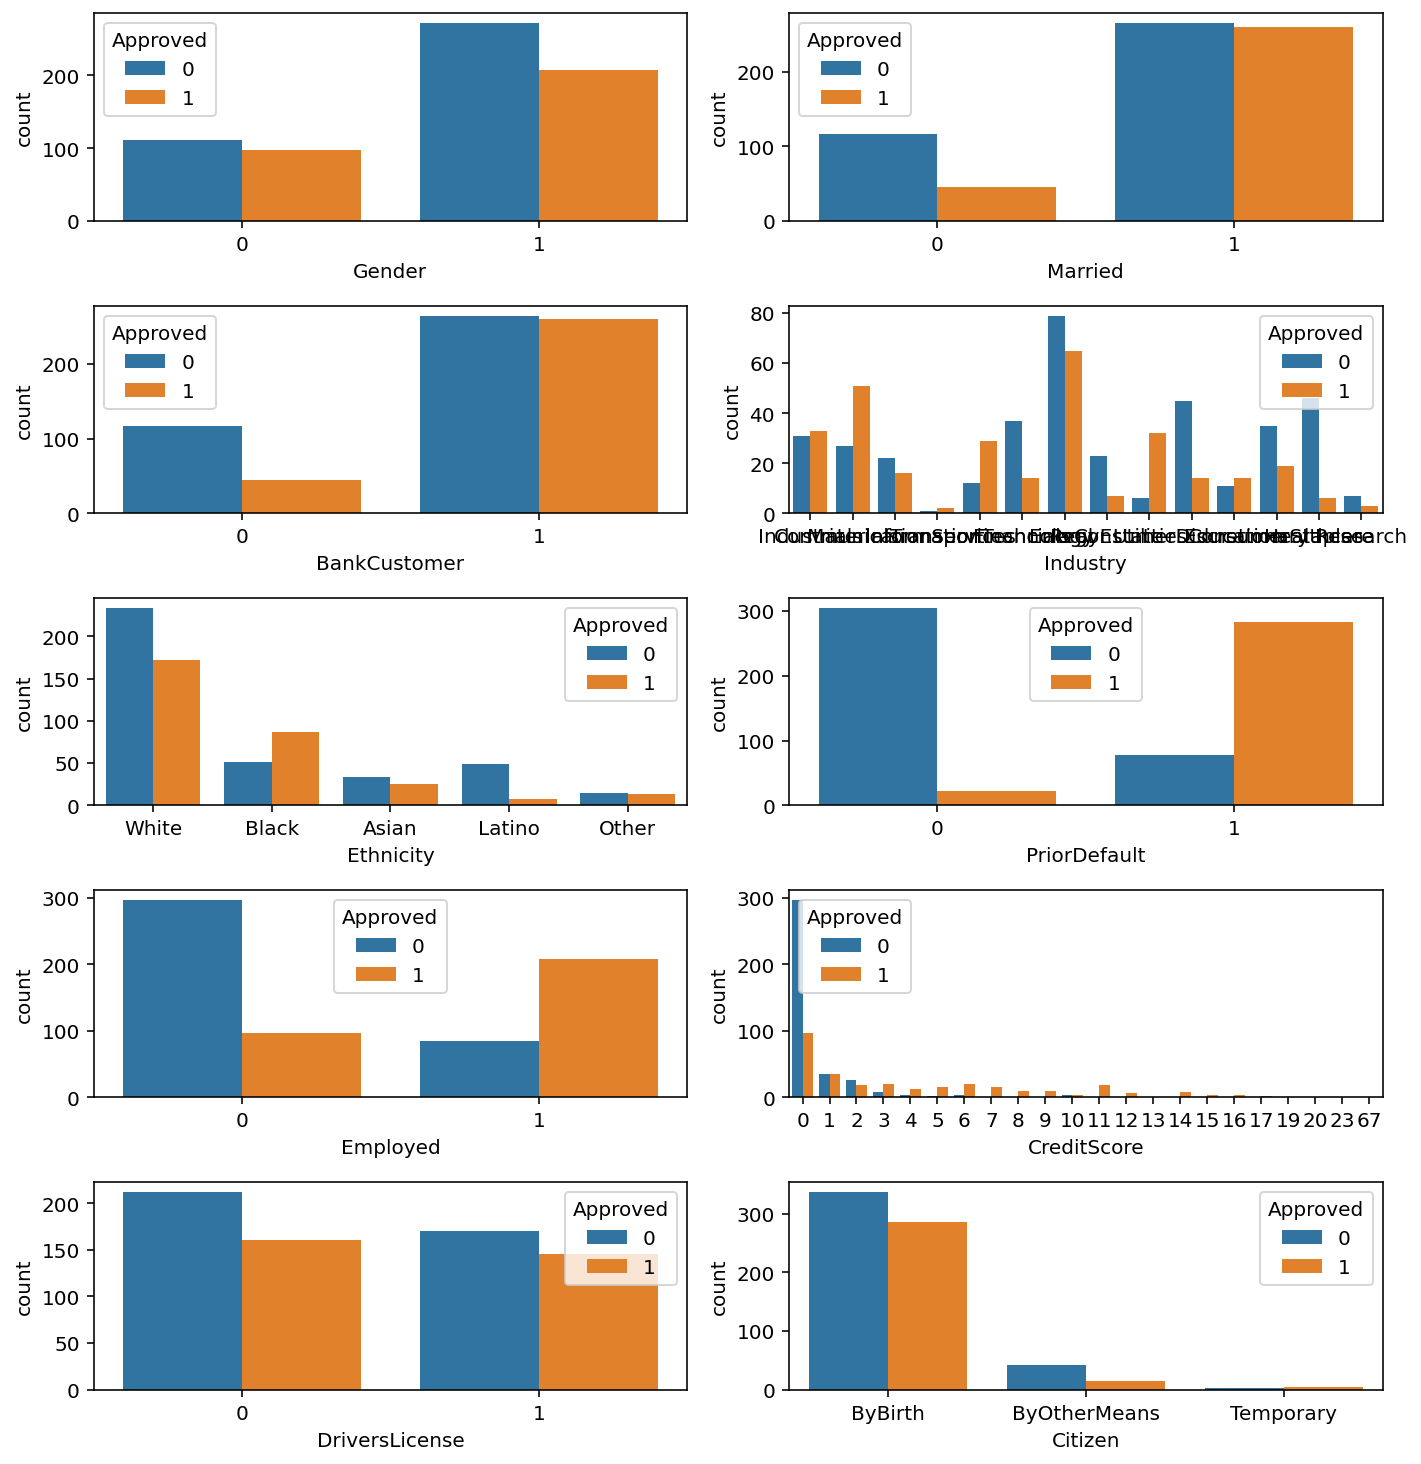

In [18]:
# A so-called 'dodged' countplot for categorical features

total = len(categorical_features) * 2
cols = 2
rows = total // cols
rows += total % cols
fig = plt.figure(figsize=(10, 20))

for pos, col in enumerate(categorical_features):
    fig.add_subplot(rows, cols, pos + 1)
    sns.countplot(x=train[col], hue=train['Approved'])
    
plt.tight_layout();    

# Preprocessing

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [20]:
train.reset_index(drop=True, inplace=True)
train.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [21]:
# Split the dataset into two pieces: train and test
# Test set for prediction (Model testing)

X, X_test, y, y_test = train_test_split(
    train.drop('Approved', axis=1), train['Approved'], test_size=0.145, random_state=0
)
print("Train size:", len(y))
print("Test size:", len(y_test))

Train size: 587
Test size: 100


In [22]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [23]:
# Features Encoding
# Some models are sensetive to scaling of numerical features

numerical_transformer = Pipeline(steps=[('scalar', StandardScaler())])
categorical_transformer = Pipeline(steps=[(
    'onehot', OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore')
)])

ct = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='passthrough') 

X = ct.fit_transform(X)
X_test = ct.transform(X_test)
X.shape, X_test.shape

((587, 54), (100, 54))

# Model selection

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [25]:
# Starter set of classifiers

classifiers = {
    'KNN': KNeighborsClassifier(),
    'LogReg': LogisticRegression(random_state=0),
    'SVC': SVC(random_state=0, probability=True),
    'RandomForest': RandomForestClassifier(random_state=0),
    'LGBM': LGBMClassifier(random_state=0),
    'CatBoost': CatBoostClassifier(random_state=0, verbose=False)
}

In [26]:
# Parameters of models for grid search

KNN_grid = {
    "n_neighbors": list(range(5, 30+1, 5)),
    "weights": ['uniform', 'distance'],
    "metric": ['euclidian', 'manhattan', 'minkowski']
}
LogReg_grid = {
    "penalty": ['l1', 'l2'],
    "C": [0.001, 0.1, 1, 5, 20]
}
SVC_grid = {
    "kernel": ['poly', 'rbf', 'sigmoid'],
    "C": [0.001, 0.1, 1, 5, 20]
}
RandomForest_grid = {
    "n_estimators": [50, 100, 500, 1000],
    "max_features": ['sqrt', 'log2']
}
LGBM_grid = {
    "n_estimators": [50, 100, 500, 1000],
    "max_depth": [3, 6, 9],
    "learning_rate": [0.001, 0.01, 0.1, 1],
}
CatBoost_grid = {
    "n_estimators": [50, 100, 500],
    "max_depth": [3, 6, 9],
    "learning_rate": [0.01, 0.1, 1],
}

grid = {
    'KNN': KNN_grid,
    'LogReg': LogReg_grid,
    'SVC': SVC_grid,
    'RandomForest': RandomForest_grid,
    'LGBM': LGBM_grid,
    'CatBoost': CatBoost_grid
}

In [27]:
from sklearn.model_selection import GridSearchCV
from time import time

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [29]:
# Models fitting without cross-validation

best_params = classifiers.copy()
nulls = np.zeros(len(classifiers))
valid_scores = pd.DataFrame({
    'Classifier': classifiers.keys(), 'Validation accuracy': nulls, 'Training time': nulls
})

for i, (key, classifier) in enumerate(classifiers.items()):
    start = time()
    clf = GridSearchCV(classifier, param_grid=grid[key], n_jobs=-1, cv=None)
    clf.fit(X_train, y_train)
    stop = time()
    valid_scores.iloc[i, 1] = clf.score(X_valid, y_valid)
    best_params[key] = clf.best_params_
    valid_scores.iloc[i, 2] = np.round((stop-start)/60, decimals=2)
    print("Model:", key)
    print("Training time (mins):", valid_scores.iloc[i, 2])

Model: KNN
Training time (mins): 0.07
Model: LogReg
Training time (mins): 0.0
Model: SVC
Training time (mins): 0.01
Model: RandomForest
Training time (mins): 0.09
Model: LGBM
Training time (mins): 0.1
Model: CatBoost
Training time (mins): 1.25


In [30]:
valid_scores

,Classifier,Validation accuracy,Training time
0,KNN,0.836735,0.07
1,LogReg,0.877551,0.00
2,SVC,0.870748,0.01
3,RandomForest,0.904762,0.09
4,LGBM,0.877551,0.10
5,CatBoost,0.897959,1.25


In [31]:
best_params

{'KNN': {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'},
 'LogReg': {'C': 1, 'penalty': 'l2'},
 'SVC': {'C': 20, 'kernel': 'rbf'},
 'RandomForest': {'max_features': 'log2', 'n_estimators': 100},
 'LGBM': {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100},
 'CatBoost': {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500}}

In [50]:
# Choice of best models

best_classifiers = {
    'RandomForest': RandomForestClassifier(**best_params['RandomForest'], random_state=0),
    'CatBoost': CatBoostClassifier(**best_params['CatBoost'], random_state=0, verbose=False),
}

# Modelling

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_curve

In [51]:
# Predictions and cross-validation

n_splits = 10
preds = np.zeros(len(X_test))
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
score = {key:[] for key in best_classifiers.keys()}

for key, classifier in best_classifiers.items():
    start = time()
    for train_ix, valid_ix in kf.split(X, y):
        clf = classifier
        X_train_, X_valid_ = X[train_ix], X[valid_ix]
        y_train_, y_valid_ = y[train_ix], y[valid_ix]
        clf.fit(X_train_, y_train_)
        preds += clf.predict_proba(X_test)[:, 1]
        score[key].append(clf.score(X_valid_, y_valid_))
    score_mean = sum(score[key]) / n_splits
    stop = time()
    print("Model:", key)
    print("Average validation accuracy:", np.round(score_mean*100, 2))
    print("Traning time (mins):", np.round((stop-start)/60, 2))

preds /= n_splits * len(best_classifiers)

Model: RandomForest
Average validation accuracy: 88.39
Traning time (mins): 0.02
Model: CatBoost
Average validation accuracy: 87.89
Traning time (mins): 0.82


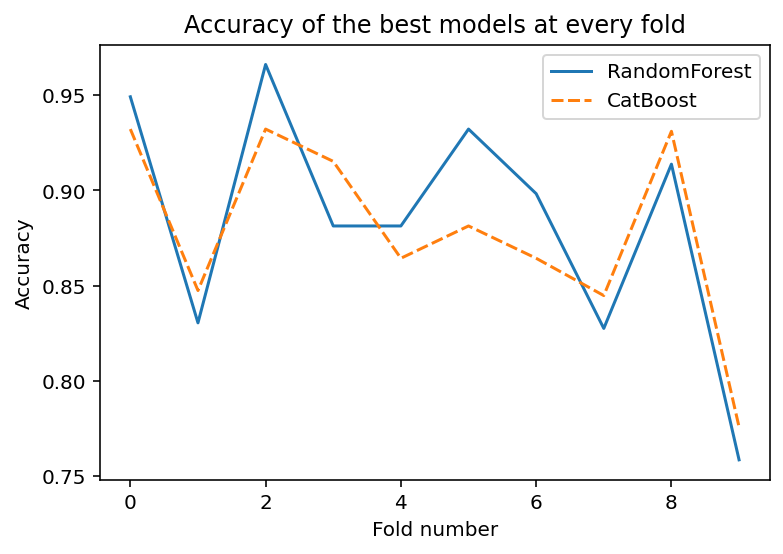

In [53]:
df_score = pd.DataFrame(score)
sns.lineplot(data=df_score)
plt.xlabel('Fold number')
plt.ylabel('Accuracy')
plt.title('Accuracy of the best models at every fold');

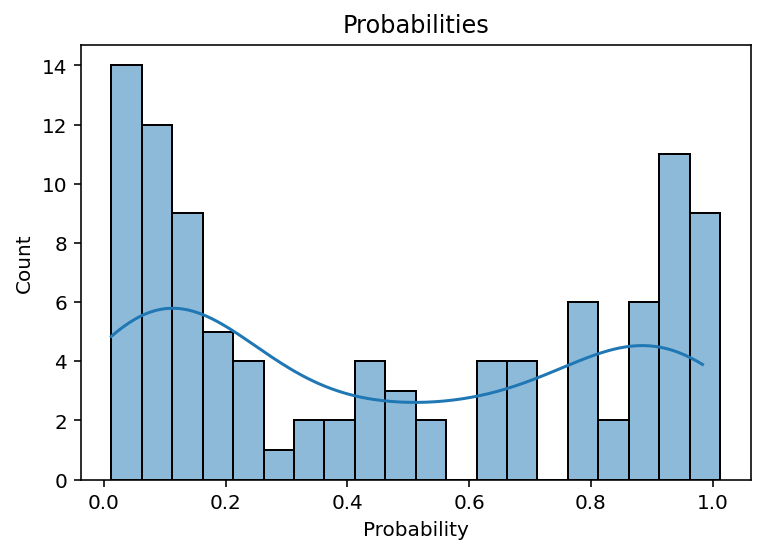

In [54]:
sns.histplot(preds, binwidth=0.05, kde=True)
plt.xlabel('Probability')
plt.title('Probabilities');

In [55]:
# Class ration
# There are too many negative predictions

print("Predictions:", np.round(100*np.round(preds).sum() / len(preds), 2))
print("Labels:", np.round(100*np.round(y_test).sum() / len(preds), 2))

Predictions: 44.0
Labels: 51.0


Best Threshold = 0.347638, G-Mean = 0.868736


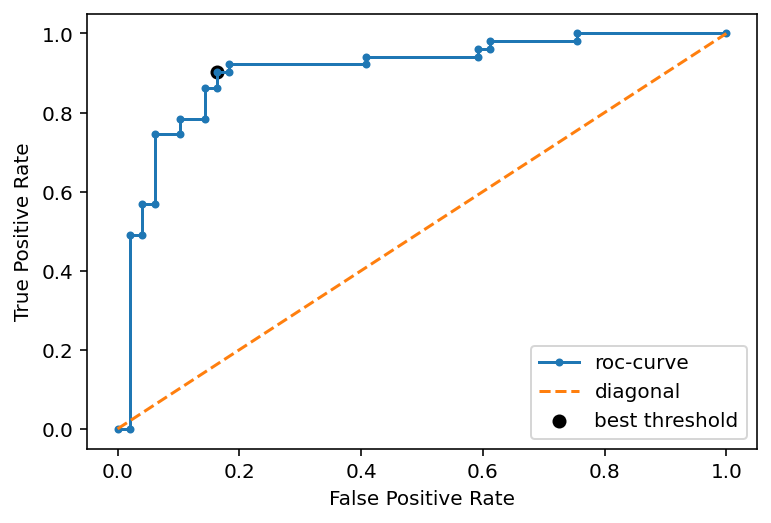

In [56]:
# So I have used the Geometric Mean to find optimal threshold

fpr, tpr, thresholds = roc_curve(y_test, preds)
gmeans = np.sqrt(tpr * (1 - fpr))
ix = np.argmax(gmeans)
print("Best Threshold = %f, G-Mean = %f" % (thresholds[ix], gmeans[ix]))
plt.plot(fpr, tpr, marker='.', label='roc-curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='diagonal')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='best threshold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show();

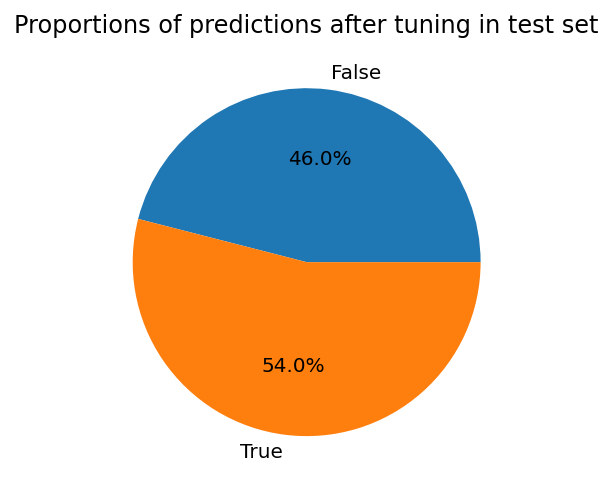

In [57]:
best_threshold = thresholds[ix]
preds_tuned = preds.copy()
preds_tuned[np.where(preds_tuned >= best_threshold)] = 1
preds_tuned[np.where(preds_tuned < best_threshold)] = 0
plt.pie(
    x=[len(preds_tuned[preds_tuned == 0]), len(preds_tuned[preds_tuned == 1])],
    autopct='%1.1f%%',
    labels=['False', 'True']
)
plt.title("Proportions of predictions after tuning in test set");

In [58]:
print("Accuracy before tuning: {}%".format(int(accuracy_score(y_test, np.round(preds))*100)))
print("Accuracy after tuning: {}%".format(int(accuracy_score(y_test, preds_tuned)*100)))

Accuracy before tuning: 83%
Accuracy after tuning: 87%
